# 6. Histograms and scatter plots

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
aapl = pd.read_csv('data/AAPL.csv', index_col='Date',
                   parse_dates=True, usecols=['Date', 'Adj Close'],
                   na_values=['nan'])

In [4]:
daily_returns_aapl = aapl['Adj Close'][:-1].values / aapl['Adj Close'][1:] - 1

## Histogram

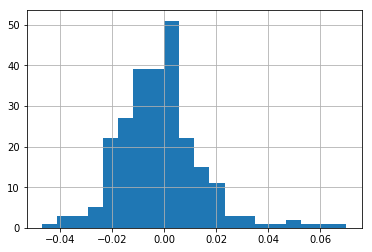

In [5]:
daily_returns_aapl.hist(bins=20)

### Statistics

Plot mean and stardard devation

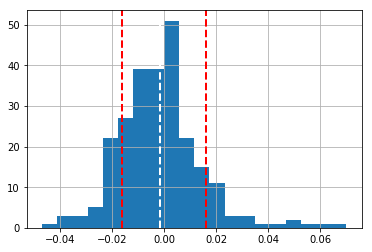

In [6]:
mean = daily_returns_aapl.mean()
std = daily_returns_aapl.std()
axvline(mean, color='w', linestyle='dashed', linewidth=2)
axvline(std, color='r', linestyle='dashed', linewidth=2)
axvline(-std, color='r', linestyle='dashed', linewidth=2)
daily_returns_aapl.hist(bins=20)

## kurtosis

Positive: "fat tails"

In [7]:
daily_returns_aapl.kurtosis()

2.8830722974533773

## Two histograms

In [8]:
spy = pd.read_csv('data/SPY.csv', index_col='Date',
                  parse_dates=True, usecols=['Date', 'Adj Close'],
                  na_values=['nan'])

Text(0.5, 1.0, 'AAPL')

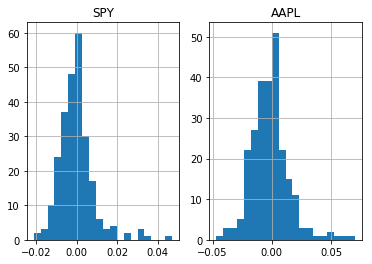

In [9]:
daily_returns_spy = spy['Adj Close'][:-1].values / spy['Adj Close'][1:] - 1

subplot(1, 2, 1)
daily_returns_spy.hist(bins=20)
title('SPY')

subplot(1, 2, 2)
daily_returns_aapl.hist(bins=20)
title('AAPL')

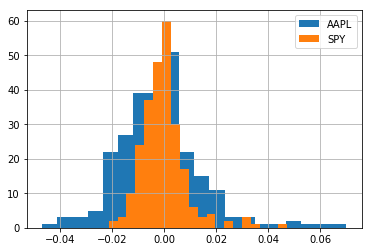

In [10]:
daily_returns_spy = spy['Adj Close'][:-1].values / spy['Adj Close'][1:] - 1

daily_returns_aapl.hist(bins=20, label='AAPL')
daily_returns_spy.hist(bins=20, label='SPY')
legend()

Seems gaussian, or normally distributed. But that ignores kurtosis.

## Scatter plots

Slope ≠ correlation

Correlation = how well it fits the line

Text(0, 0.5, 'aapl')

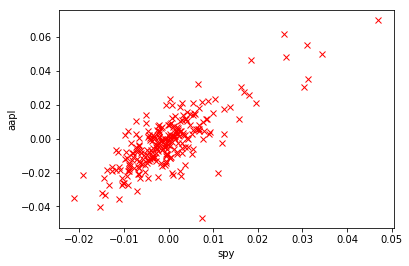

In [11]:
plot(daily_returns_spy, daily_returns_aapl, 'rx')
xlabel('spy')
ylabel('aapl')

Text(0, 0.5, 'aapl')

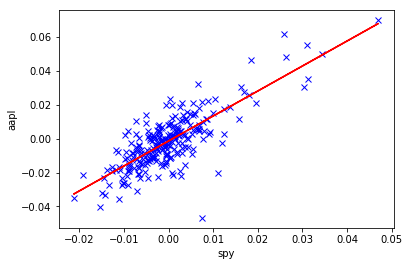

In [12]:
a, b = np.polyfit(daily_returns_spy, daily_returns_aapl, 1)

plot(daily_returns_spy, daily_returns_aapl, 'bx')
plot(daily_returns_spy, daily_returns_spy * a + b, 'r-')
xlabel('spy')
ylabel('aapl')

## Correlation

In [13]:
goog = pd.read_csv('data/GOOG.csv', index_col='Date',
                   parse_dates=True, usecols=['Date', 'Adj Close'],
                   na_values=['nan'])

In [14]:
aapl = aapl.rename(columns={'Adj Close': 'AAPL'})
spy = spy.rename(columns={'Adj Close': 'SPY'})
goog = goog.rename(columns={'Adj Close': 'GOOG'})
df = spy.join(aapl.join(goog, how='inner'), how='inner')
df.corr(method='pearson')

,SPY,AAPL,GOOG
SPY,1.000000,0.971272,0.903637
AAPL,0.971272,1.000000,0.941633
GOOG,0.903637,0.941633,1.000000
